# Economic Data Analysis | Welcome Survey

Let's get to know the class!

In [7]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = 'data/'

plt.rcParams.update({
    'font.family': 'serif',              # Set the font family
    'font.serif': ['Times New Roman'],   # Use a specific serif font
    'font.size': 16,                     # Set the general font size
    'axes.titlesize': 20,                # Set the font size of the title
    'axes.labelsize': 16,                # Set the font size of axis labels
    'font.style': 'italic',              # Set the font style to italic
    'figure.dpi': 400   
})

category_color_pal = sns.color_palette("hls", 8)#sns.color_palette("husl", 8)
continuous_color_pal = sns.color_palette("rocket_r", as_cmap=True)

## Data Cleaning

In [3]:
data = pd.read_csv(file_path + 'Fall_2025_Survey_raw.csv')

# Date
data['When is your birthyear?'] = pd.to_datetime(data['When is your birthday?']).dt.year
data['When is your birthmonth?'] = pd.to_datetime(data['When is your birthday?']).dt.month

# Color
color_mapping = {
    # Standardize capitalization
    'blue': 'Blue',
    'purple': 'Purple', 
    'green': 'Green',
    'red': 'Red',
    'yellow': 'Yellow',
    'pink': 'Pink',
    'orange': 'Orange',
    'black': 'Black',
    
    # Fix typos
    'Greeen': 'Green',
    
    # Group light/dark variations with main color
    'Light Blue': 'Blue',
    'Dark blue': 'Blue',
    'Navy blue': 'Blue', 
    'Navy Blue': 'Blue',
    'Baby Blue': 'Blue',
    
    'Dark Green': 'Green',
    'Dark green': 'Green', 
    'dark green': 'Green',
    'Melon Green': 'Green',  # Assuming this is a green shade
    
    'Deep Red': 'Red',
    
    # Standardize other colors
    'white': 'White',
    'Grey': 'Gray',  # or keep as 'Grey' if you prefer
    'Gold': 'Yellow',  # Gold is yellowish
    
    # Handle the complex answer - they said green as backup
    'Black (if that doesn’t count then probably green)': 'Black',
}
data['What is your favorite color?'] = data['What is your favorite color?'].replace(color_mapping)

# Distance
data['Approximately how many miles away from Pittsburgh is your hometown?'] = data['Approximately how many miles away from Pittsburgh is your hometown?'].str.extract(r'(\d+(?:\.\d+)?)', expand=False).astype(float)

# Save
data.to_csv(file_path + 'Fall_2025_Survey.csv')

## Load Survey Data

In [4]:
data = pd.read_csv(file_path + 'Fall_2025_Survey.csv')

## Hometown Distance

How far away are you coming from?

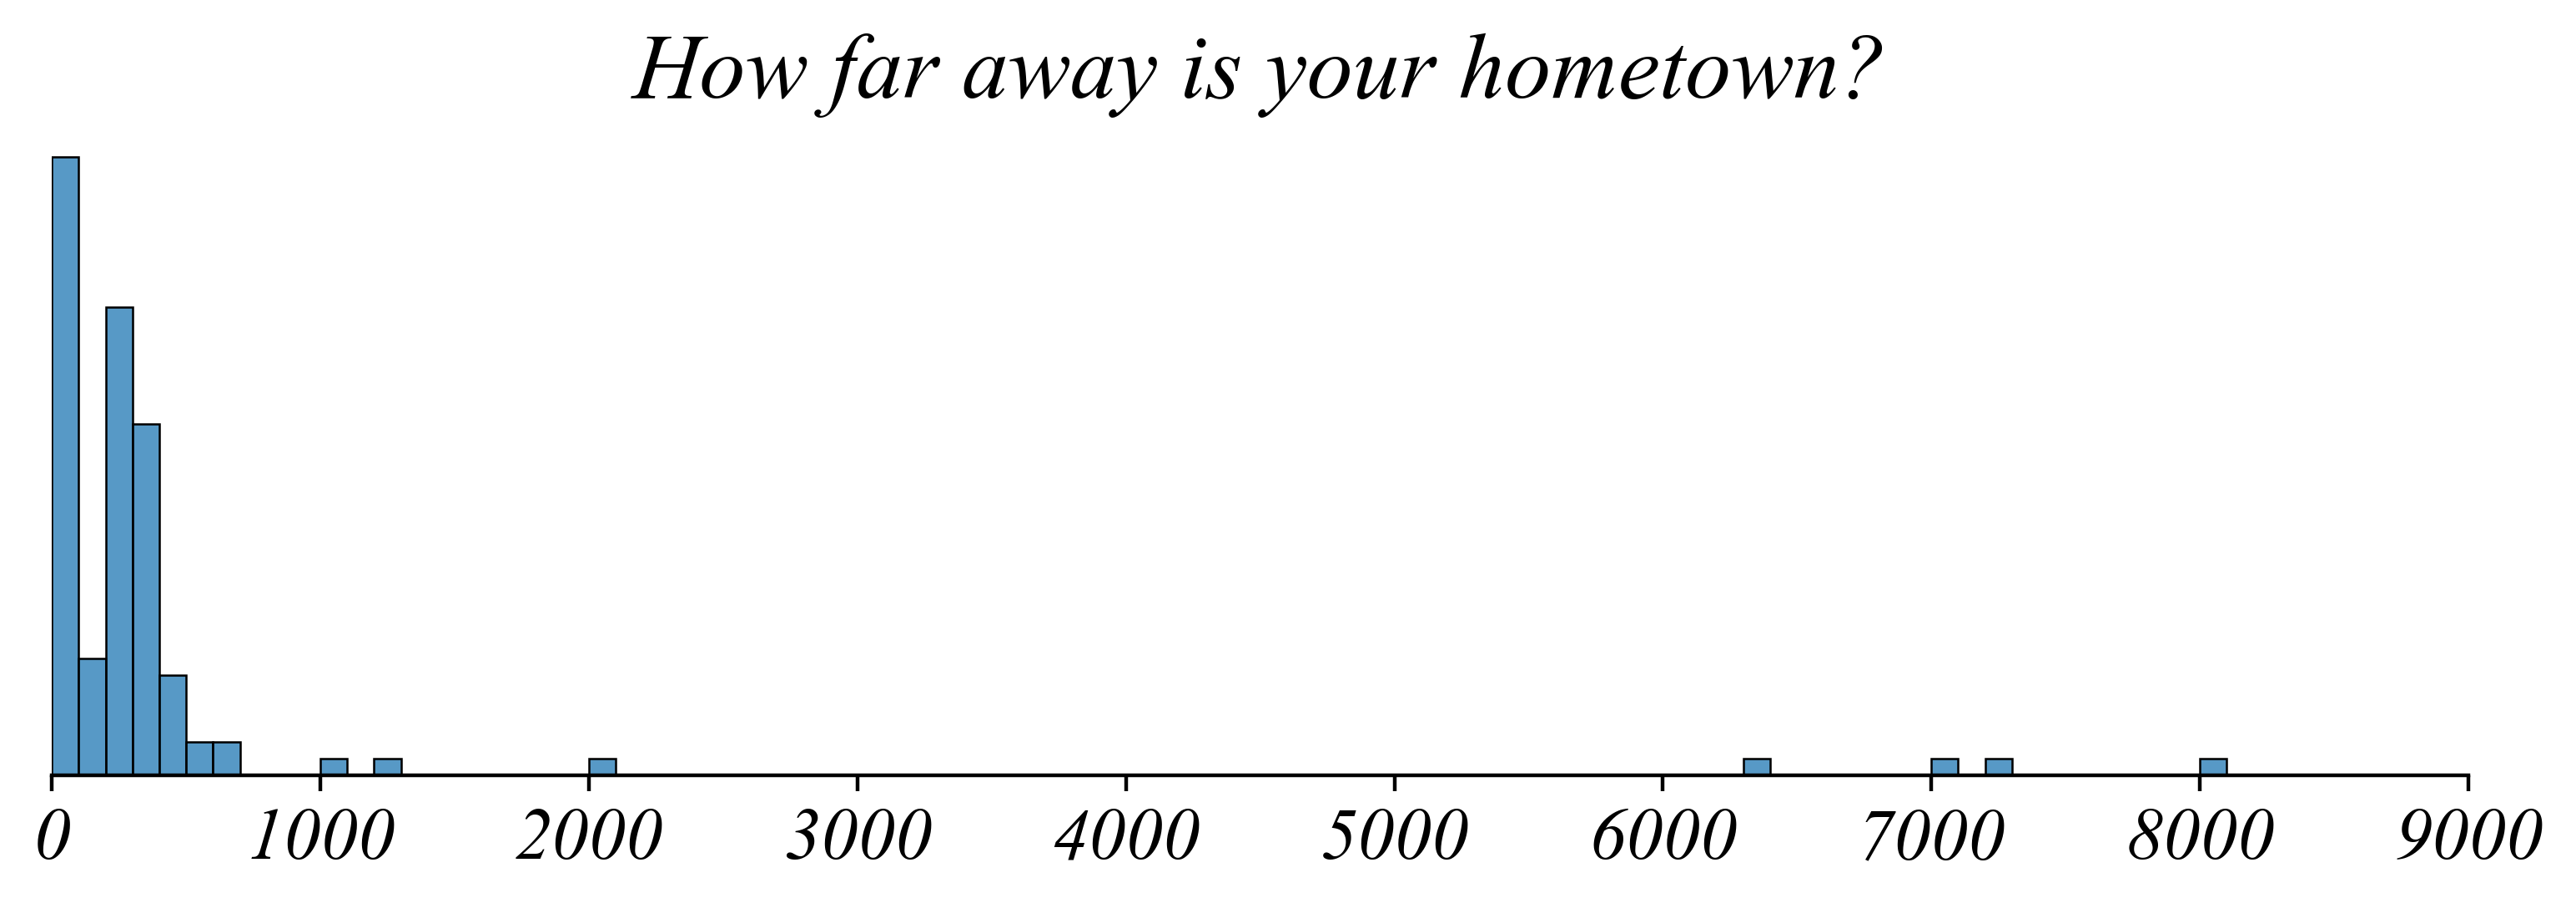

In [50]:
# Figure
plt.figure(figsize=(8, 3), dpi=400)
sns.histplot(data=data, bins=range(0,9000,100),
    x='Approximately how many miles away from Pittsburgh is your hometown?')

# Styling
plt.title('How far away is your hometown?')
plt.xlabel('')
plt.xlim(0,9000)
plt.ylabel('')
plt.yticks([])
sns.despine(left=True, right=True, top=True)
plt.tight_layout()

# Save
plt.savefig('i/survey_01.png')

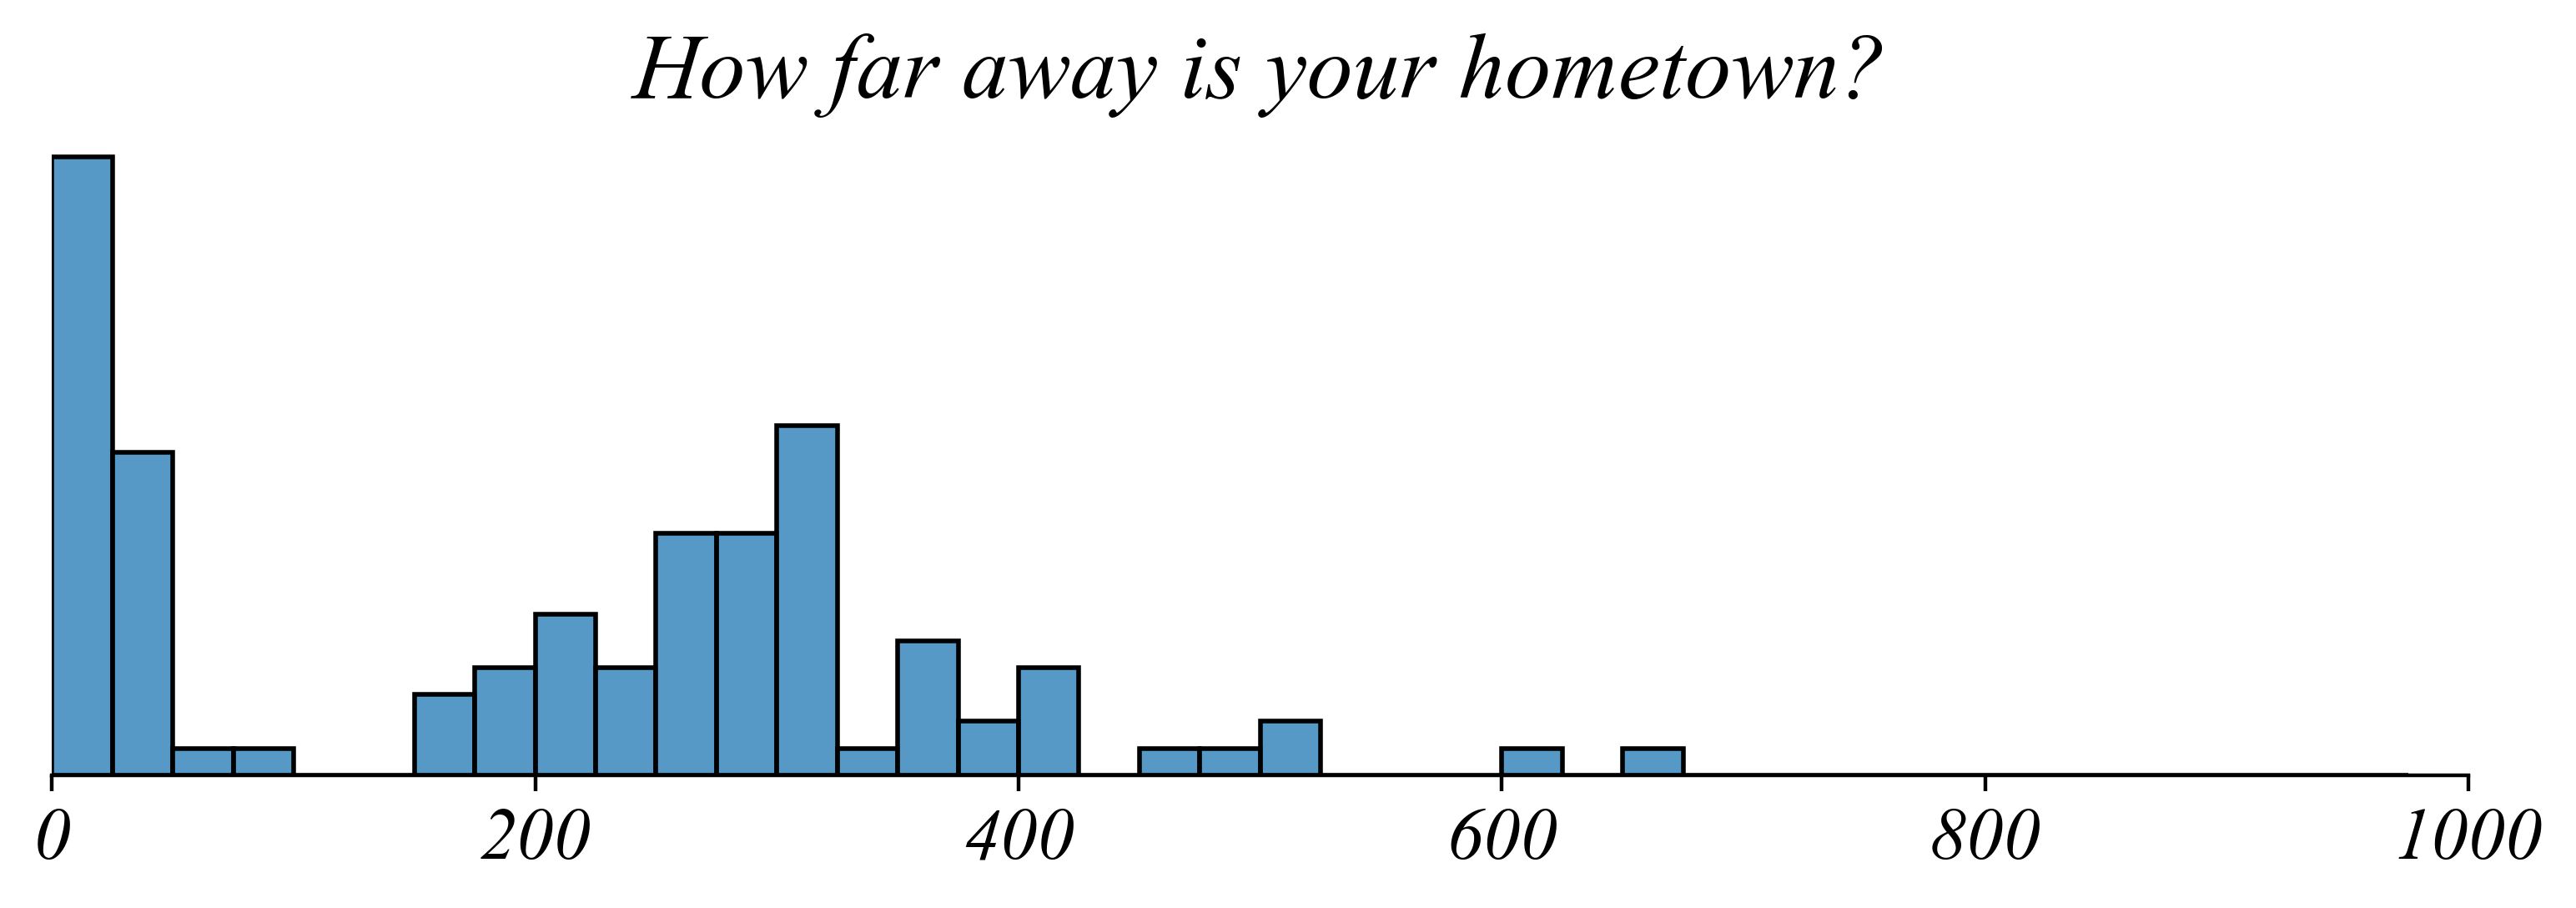

In [49]:
# Figure
plt.figure(figsize=(8, 3), dpi=400)
sns.histplot(data=data, bins=range(0,1000,25),
    x='Approximately how many miles away from Pittsburgh is your hometown?')

# Styling
plt.title('How far away is your hometown?')
plt.xlabel('')
plt.xlim(0,1000)
plt.ylabel('')
plt.yticks([])
sns.despine(left=True, right=True, top=True)
plt.tight_layout()

# Save
plt.savefig('i/survey_02.png')

## Birthday

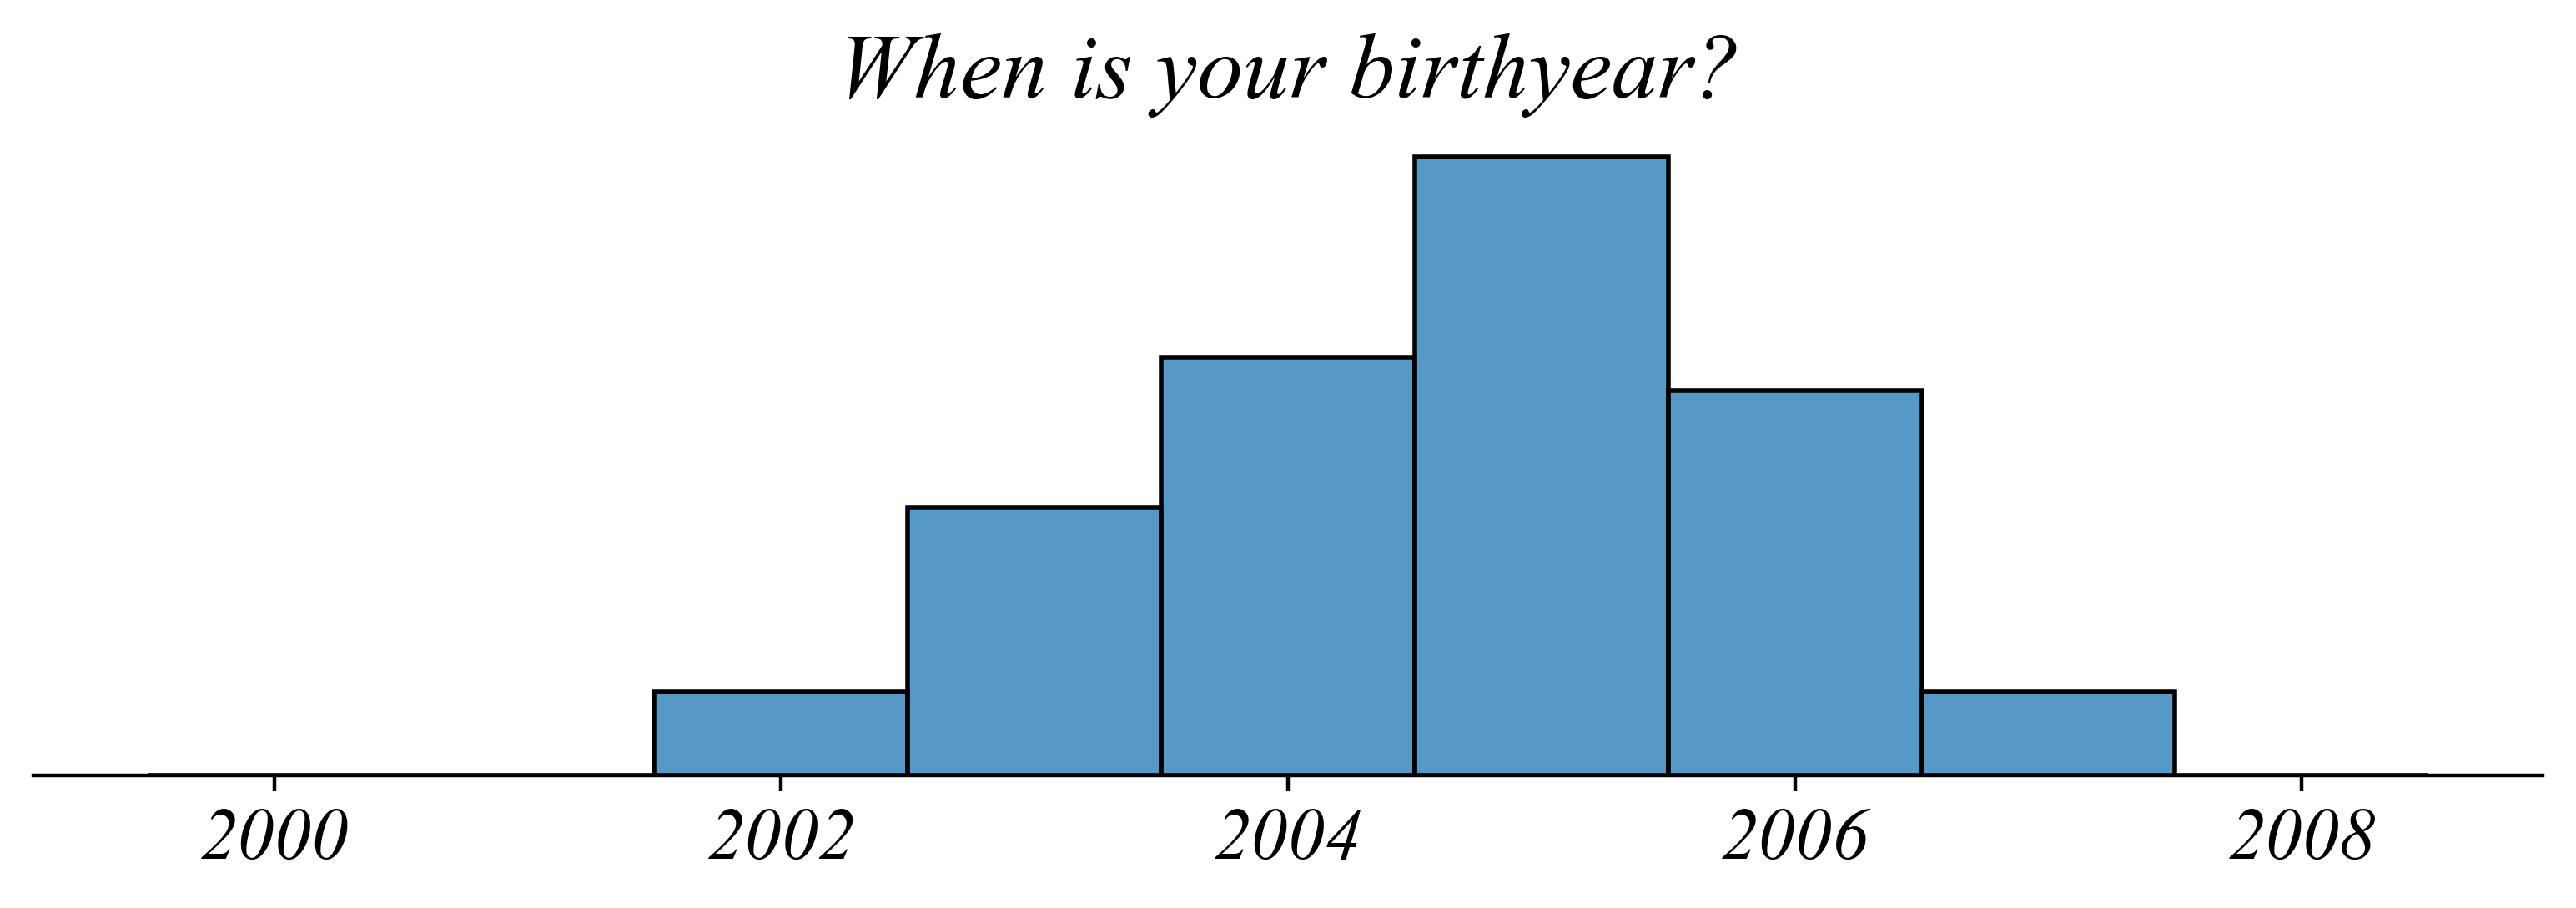

In [48]:
# Figure
plt.figure(figsize=(8, 3), dpi=400)
bins = np.arange(2000,2010,1)
sns.histplot(data=data, x='When is your birthyear?', bins=bins-0.5)

# Styling
plt.title('When is your birthyear?')
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
sns.despine(left=True, right=True, top=True)
plt.tight_layout()

# Save
plt.savefig('i/survey_03.png')

## Major

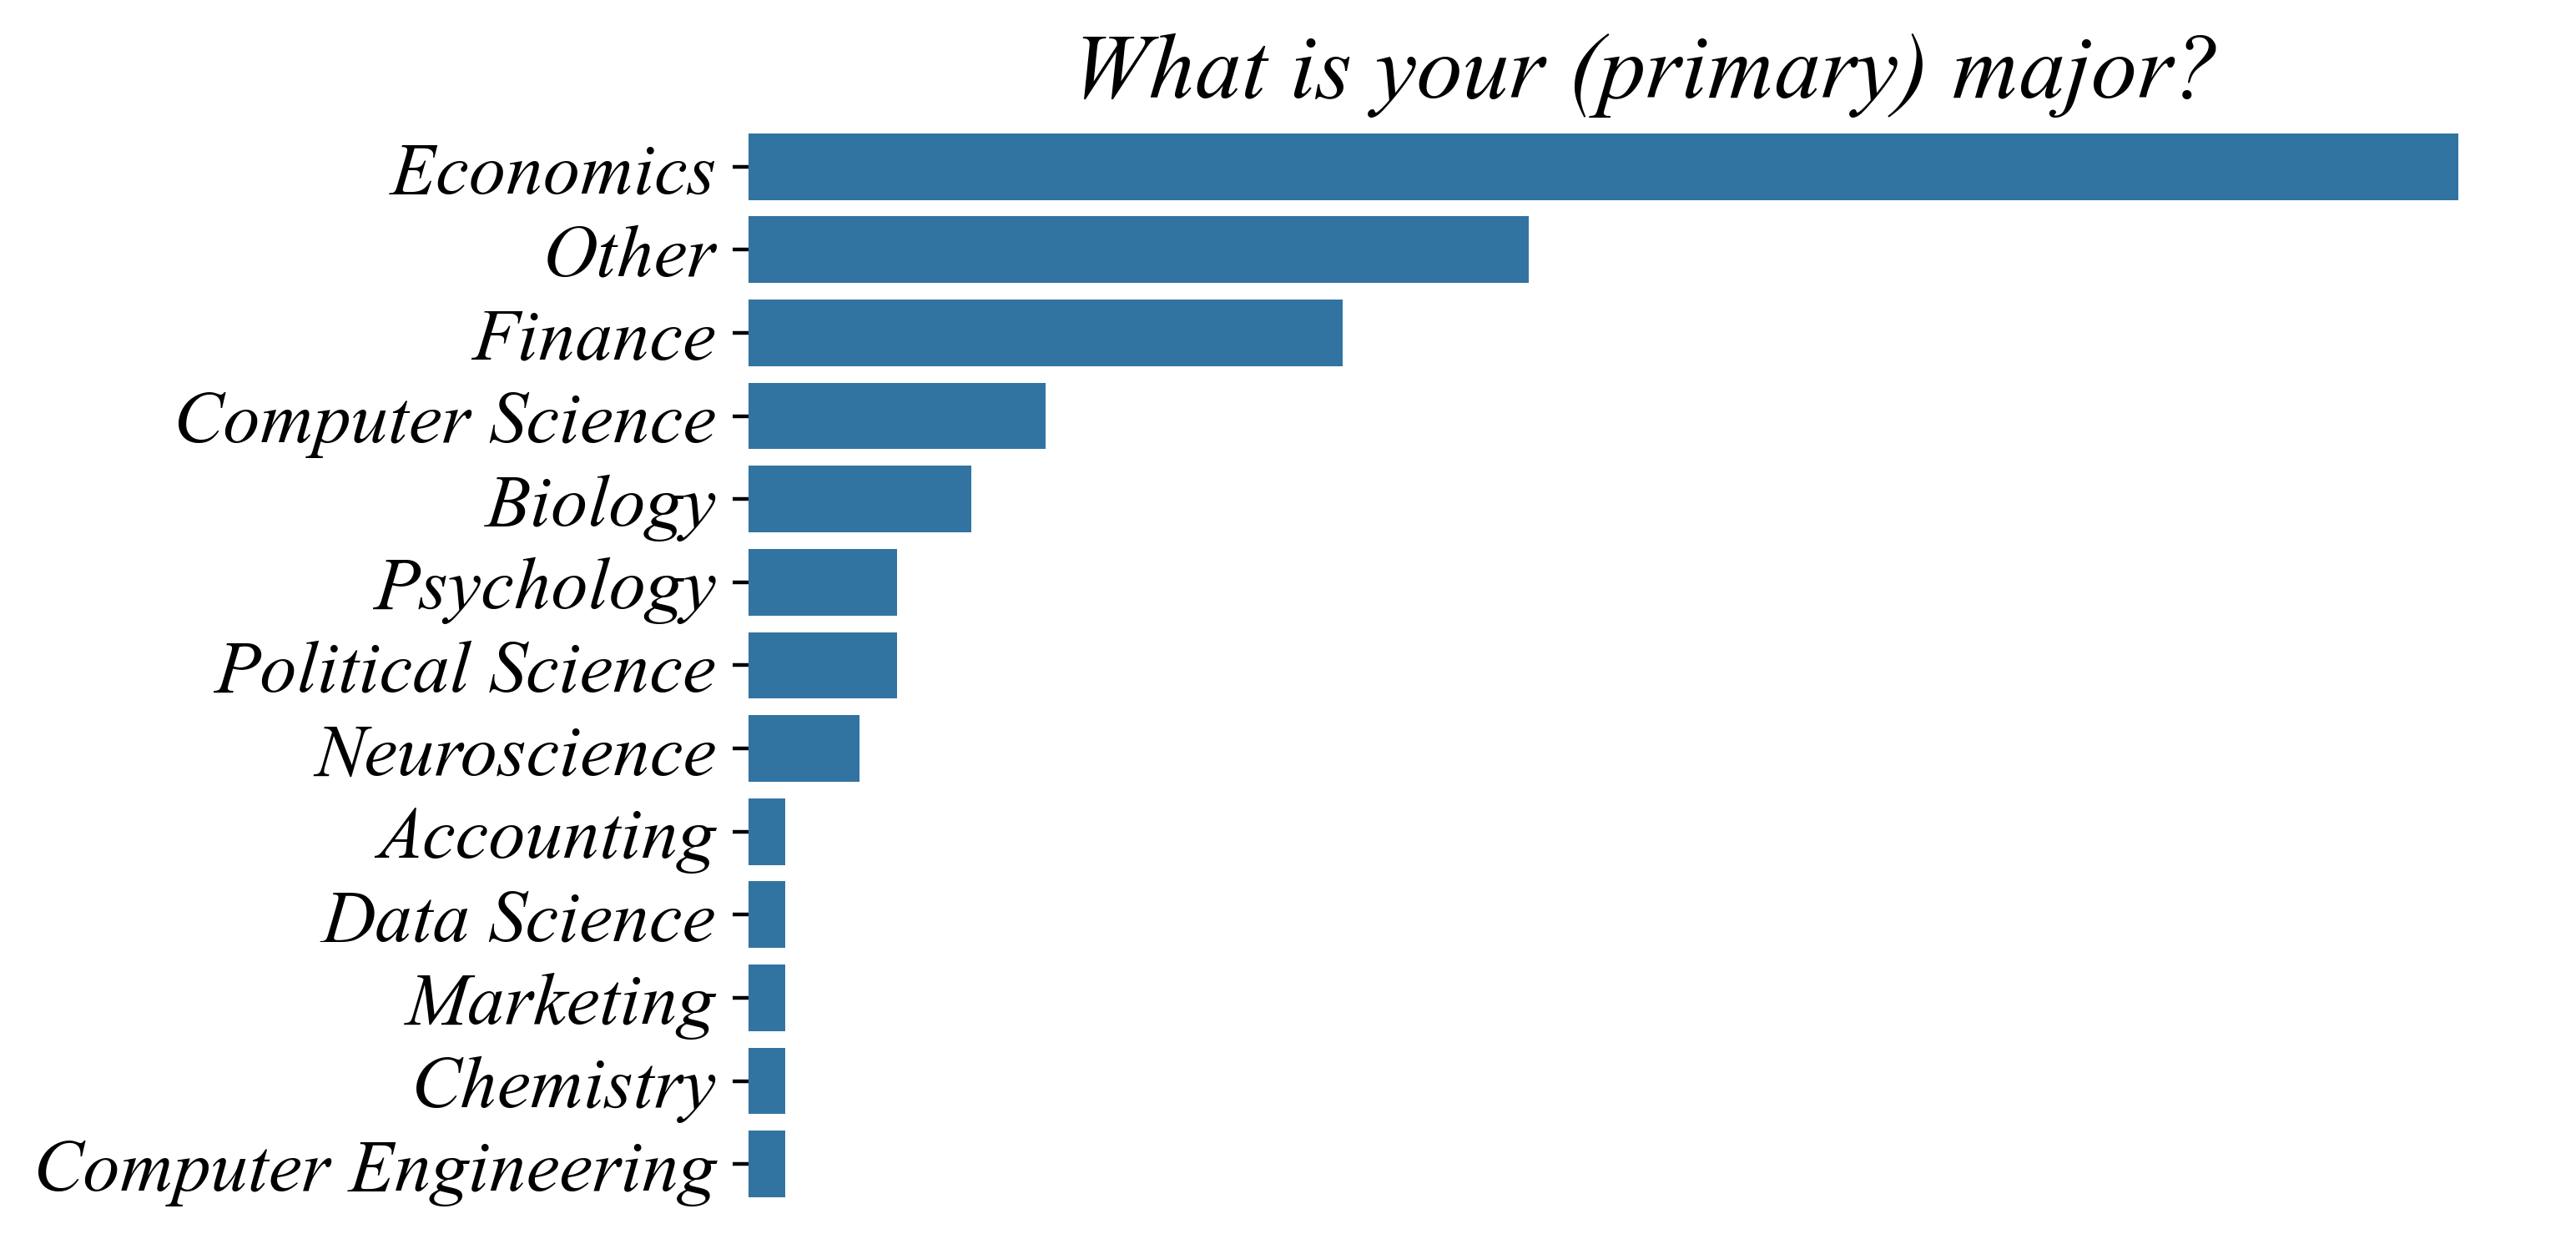

In [46]:
# Figure
plt.figure(figsize=(8, 4), dpi=400)
order = data['What is your (primary) major?'].value_counts().index
sns.countplot(data=data, y='What is your (primary) major?', order=order)

# Styling
plt.title('What is your (primary) major?')
plt.xlabel('')
plt.xticks([])
plt.ylabel('')
sns.despine(left=True, right=True, top=True, bottom=True)
plt.tight_layout()

# Save
plt.savefig('i/survey_04.png')

## Statistics

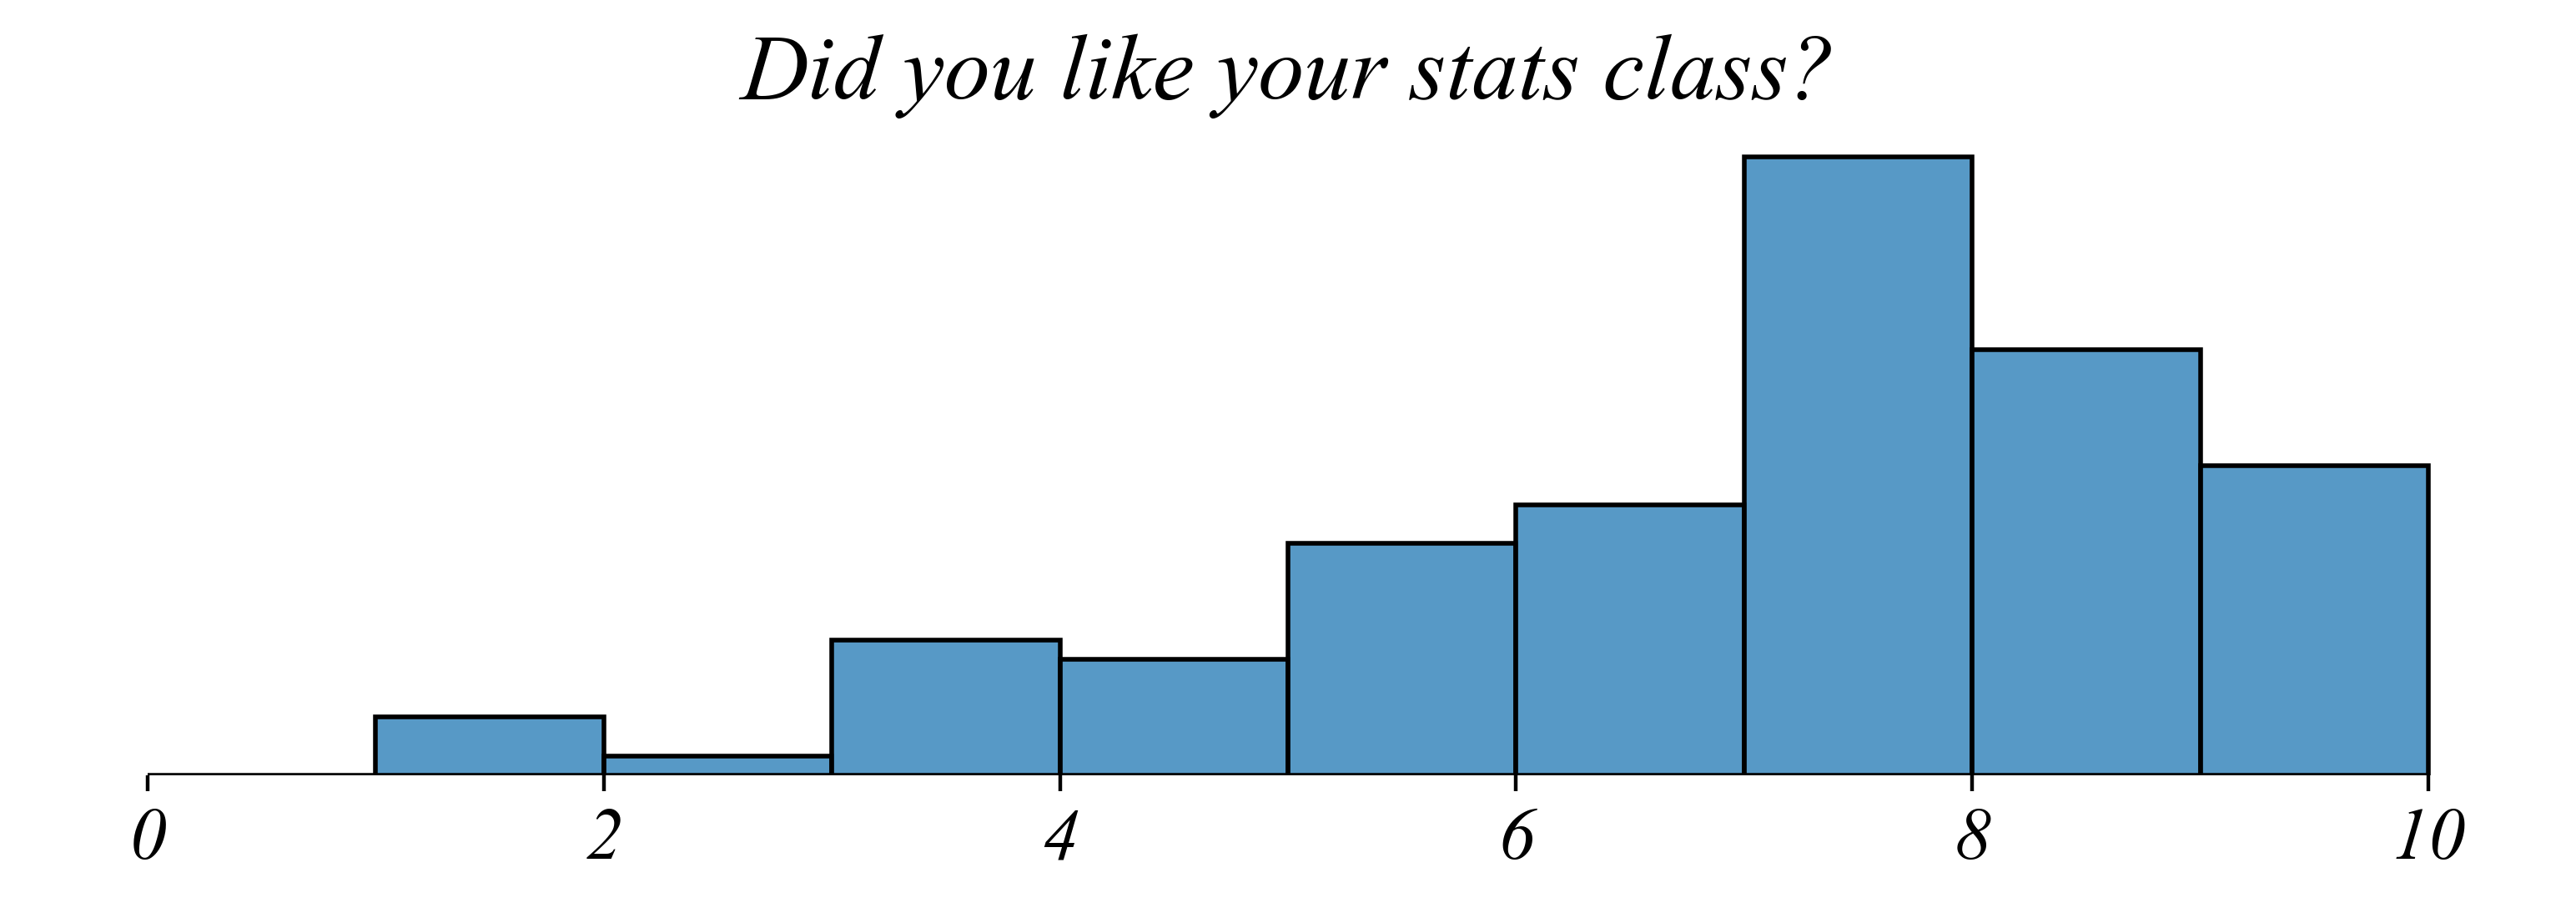

In [53]:
# Figure
plt.figure(figsize=(8, 3), dpi=400)
sns.histplot(data=data, x='How much did you like your statistics class?', bins=range(0,11,1))

# Styling
plt.title('Did you like your stats class?')
plt.xlabel('')
plt.yticks([])
plt.ylabel('')
sns.despine(left=True, right=True, top=True, bottom=True)
plt.tight_layout()

# Save
plt.savefig('i/survey_05.png')

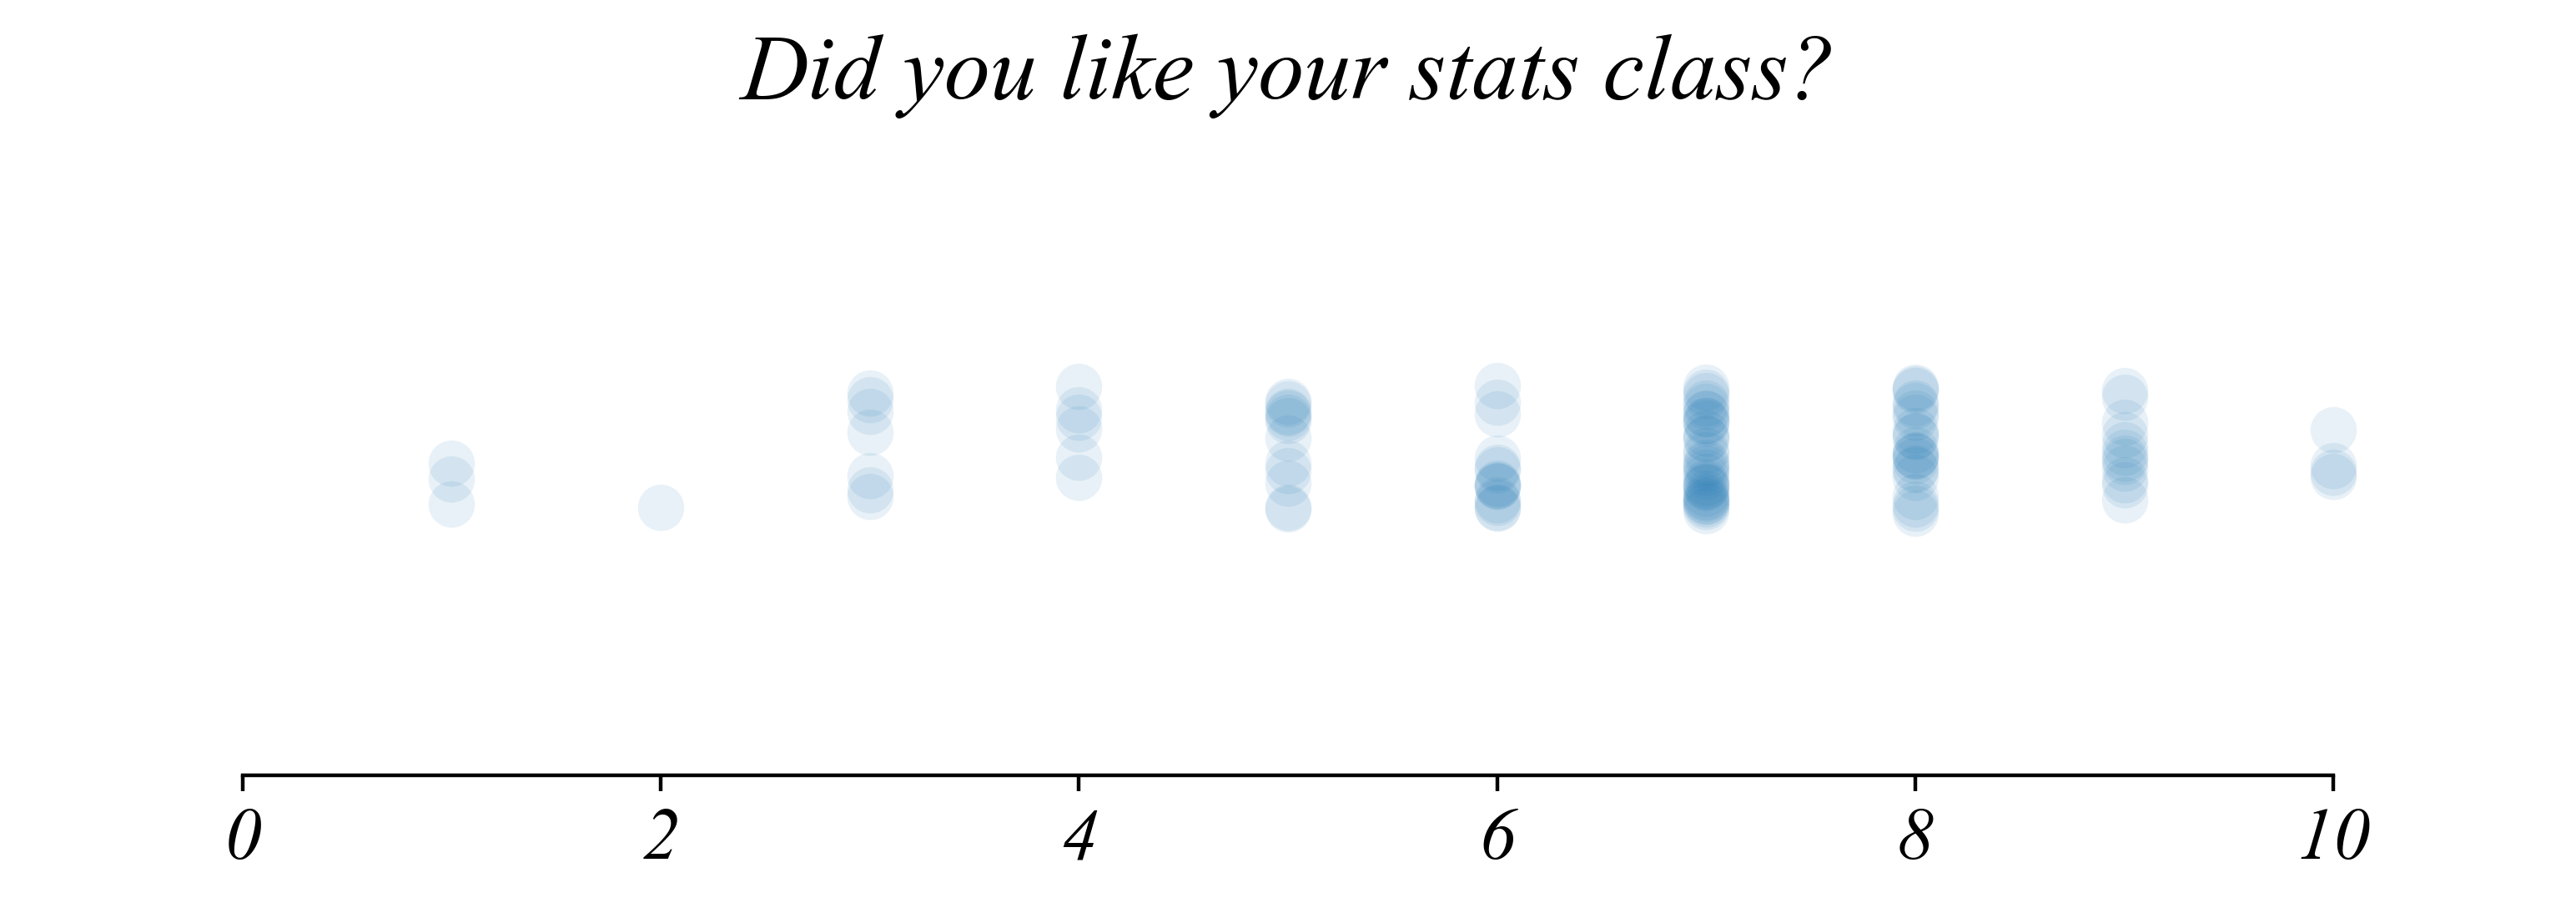

In [68]:
# Figure
plt.figure(figsize=(8, 3), dpi=400)
sns.stripplot(data=data, x='How much did you like your statistics class?', alpha=0.1, s=10)

# Styling
plt.title('Did you like your stats class?')
plt.xlabel('')
plt.xlim(-1,11)
plt.yticks([])
plt.ylabel('')
sns.despine(left=True, right=True, top=True, bottom=False, trim=True)
plt.tight_layout()

# Save
plt.savefig('i/survey_05_a.png')

## Statistics and Economic Data Analysis

<Figure size 3200x3200 with 0 Axes>

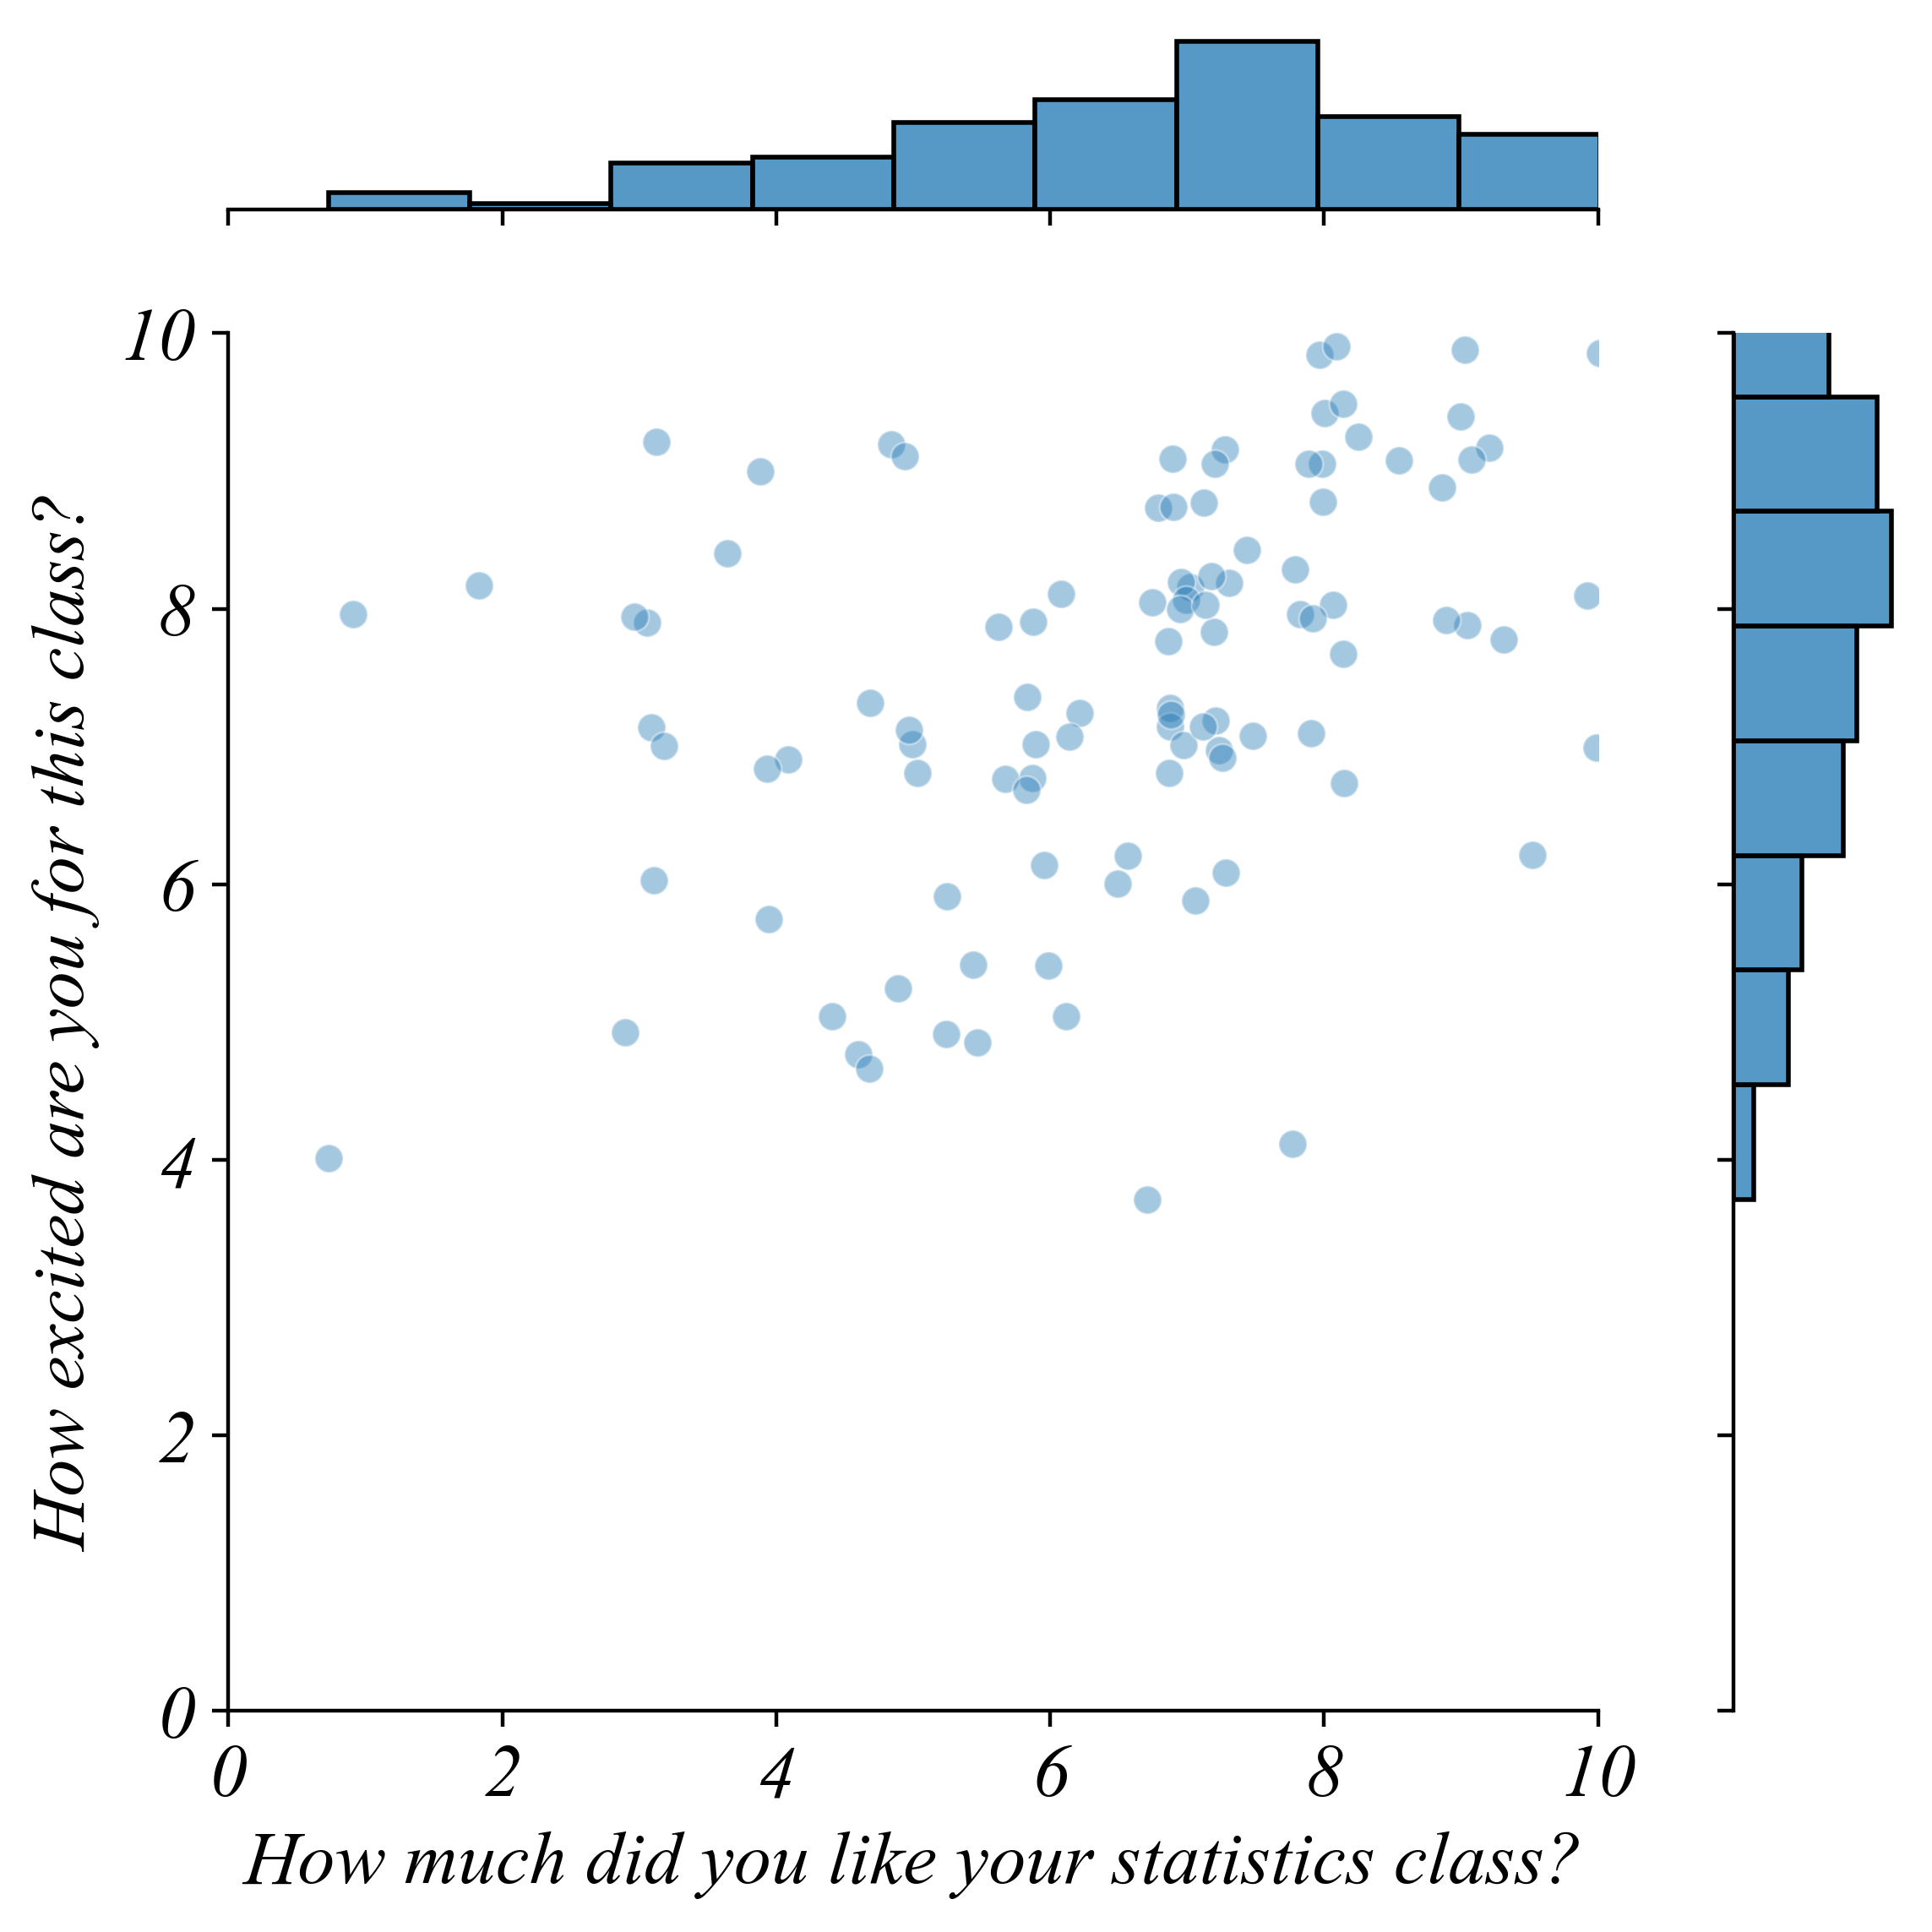

In [153]:
# Figure
plt.figure(figsize=(8, 8), dpi=400)

x_jitter = data['How much did you like your statistics class?'] + np.random.normal(0, 0.2, len(data))
y_jitter = data['How excited are you for this class?'] + np.random.normal(0, 0.2, len(data))

sns.jointplot(x=x_jitter, y=y_jitter, alpha=0.4)

# Styling
plt.xlabel('How much did you like your statistics class?')
plt.xlim(0,10)
plt.ylabel('How excited are you for this class?')
plt.ylim(0,10)
plt.tight_layout()

# Save
plt.savefig('i/survey_06.png')

## Economic Data and Excel

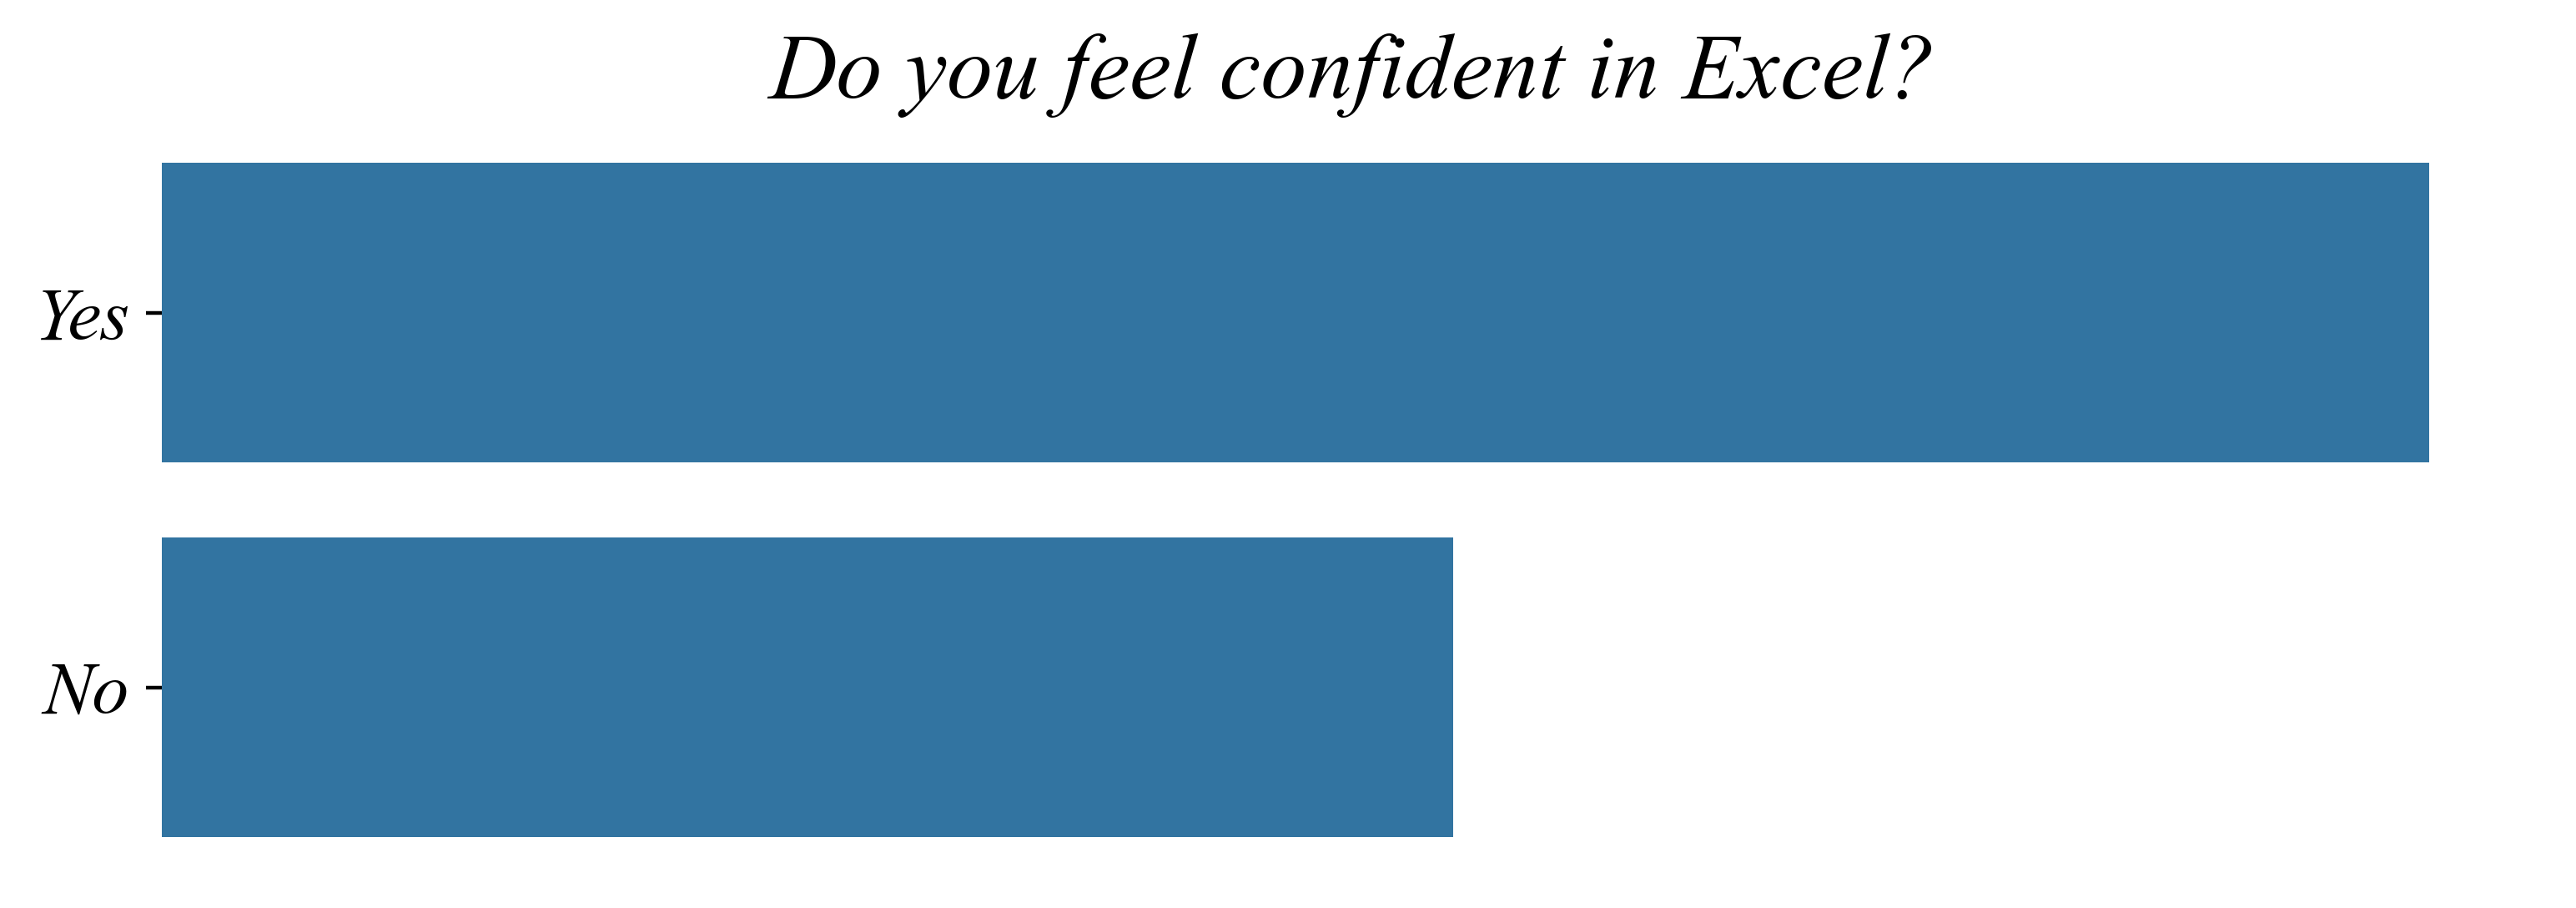

In [83]:
# Figure
plt.figure(figsize=(8, 3), dpi=400)
sns.countplot(data=data, y='Do you feel confident in Excel?')

# Styling
plt.title('Do you feel confident in Excel?')
plt.xticks([])
plt.xlabel('')
plt.ylabel('')
sns.despine(left=True, right=True, top=True, bottom=True)
plt.tight_layout()

# Save
plt.savefig('i/survey_07.png')

/var/folders/xc/wlq2_w5j6zncfqys5_nfww4w0000gn/T/ipykernel_1246/3431006187.py:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:firebrick'` for the same effect.

  sns.swarmplot(y=data['Do you feel confident in Excel?'],


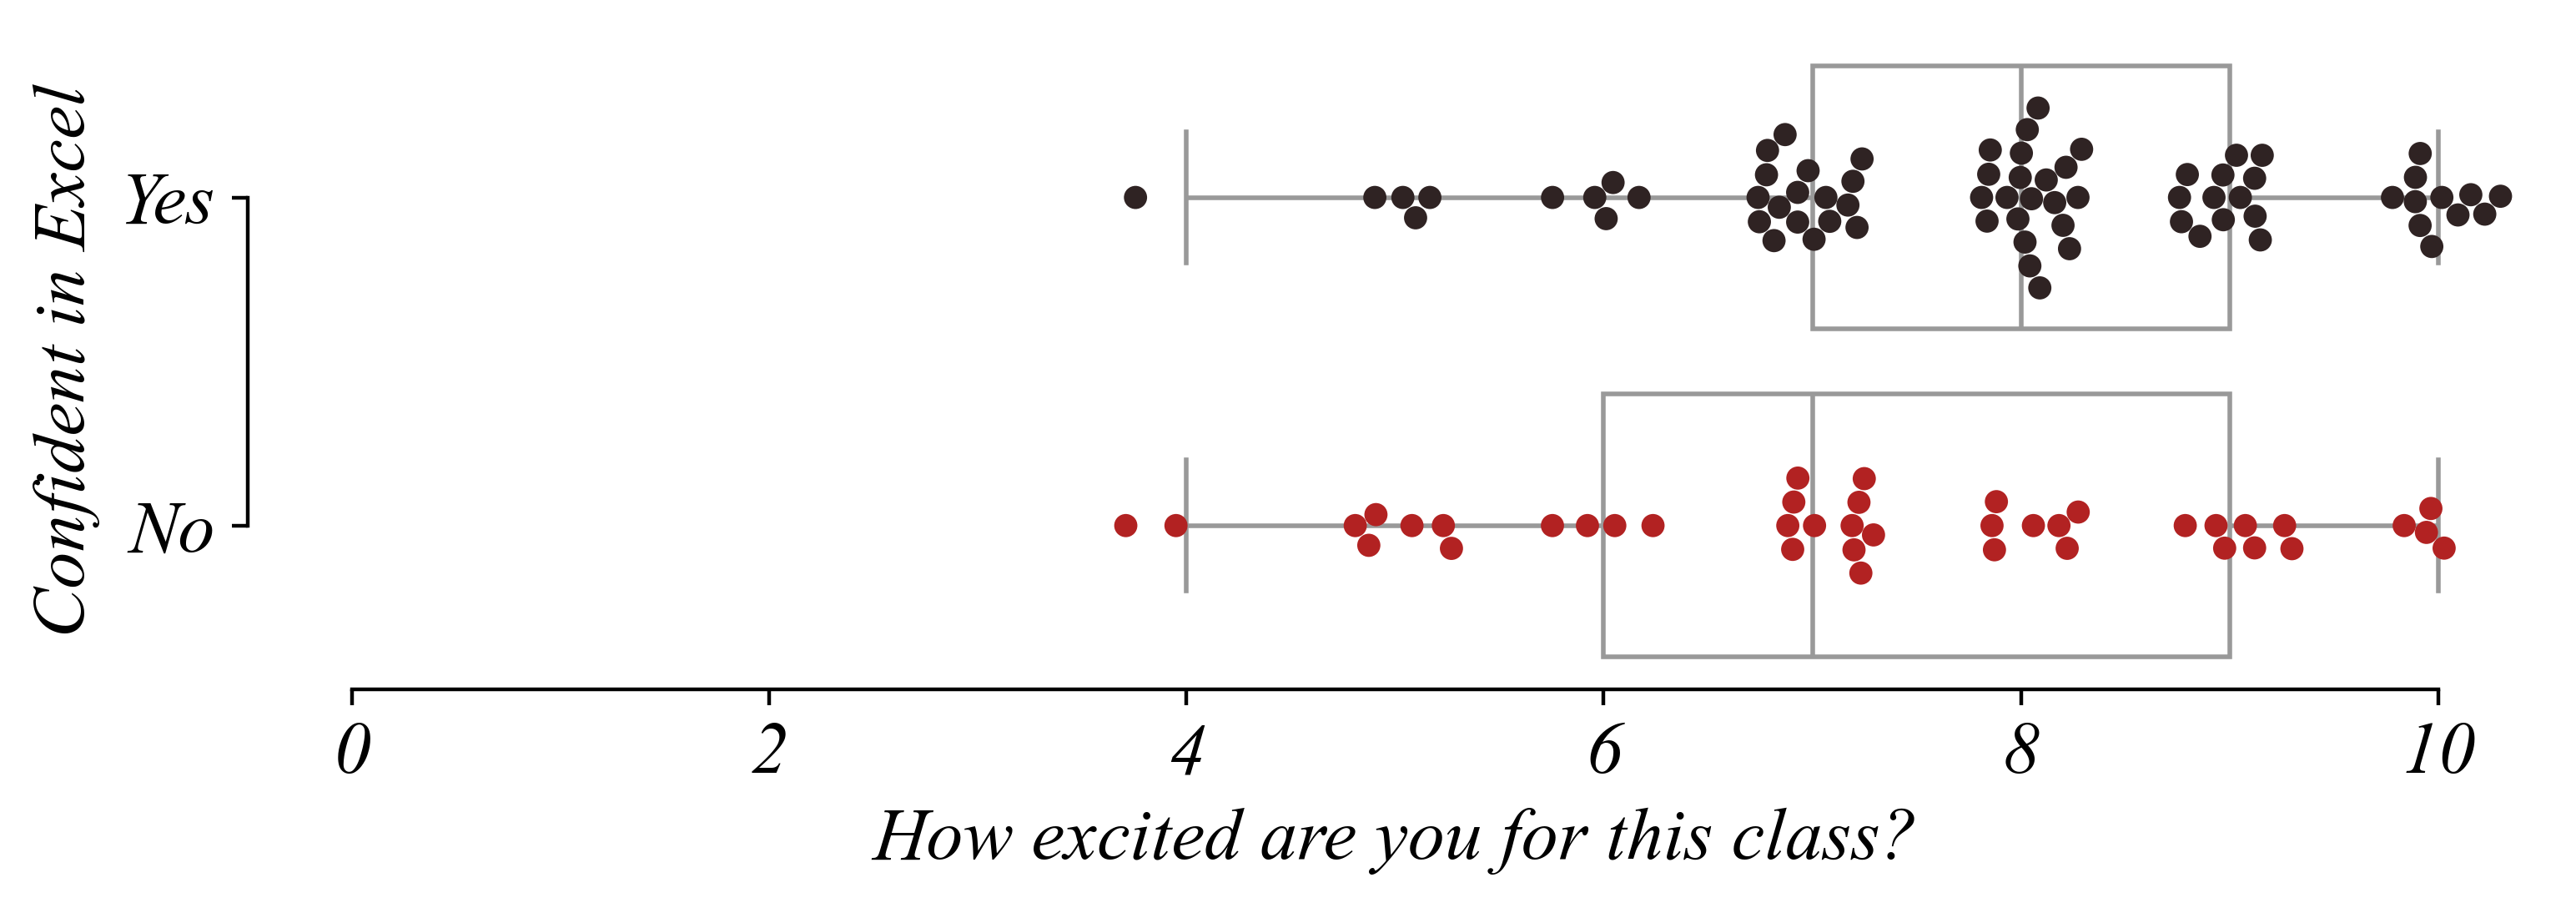

In [142]:
# Figure
plt.figure(figsize=(8, 3), dpi=400)

sns.boxplot(data=data, y='Do you feel confident in Excel?', 
            x='How excited are you for this class?',
            color='white')

x_jittered = data['How excited are you for this class?'] + np.random.uniform(-0.3, 0.3, len(data))
sns.swarmplot(y=data['Do you feel confident in Excel?'], 
              x=x_jittered,
              hue=data['Do you feel confident in Excel?'],
              color='firebrick')

# Styling
plt.xticks()
plt.xlim(-0.5,10.5)
plt.xlabel('How excited are you for this class?')
plt.ylabel('Confident in Excel')
sns.despine(left=False, right=True, top=True, bottom=False, trim=True)
plt.tight_layout()

# Save
plt.savefig('i/survey_07.png')

## Economic Data and Python

<Figure size 3200x3200 with 0 Axes>

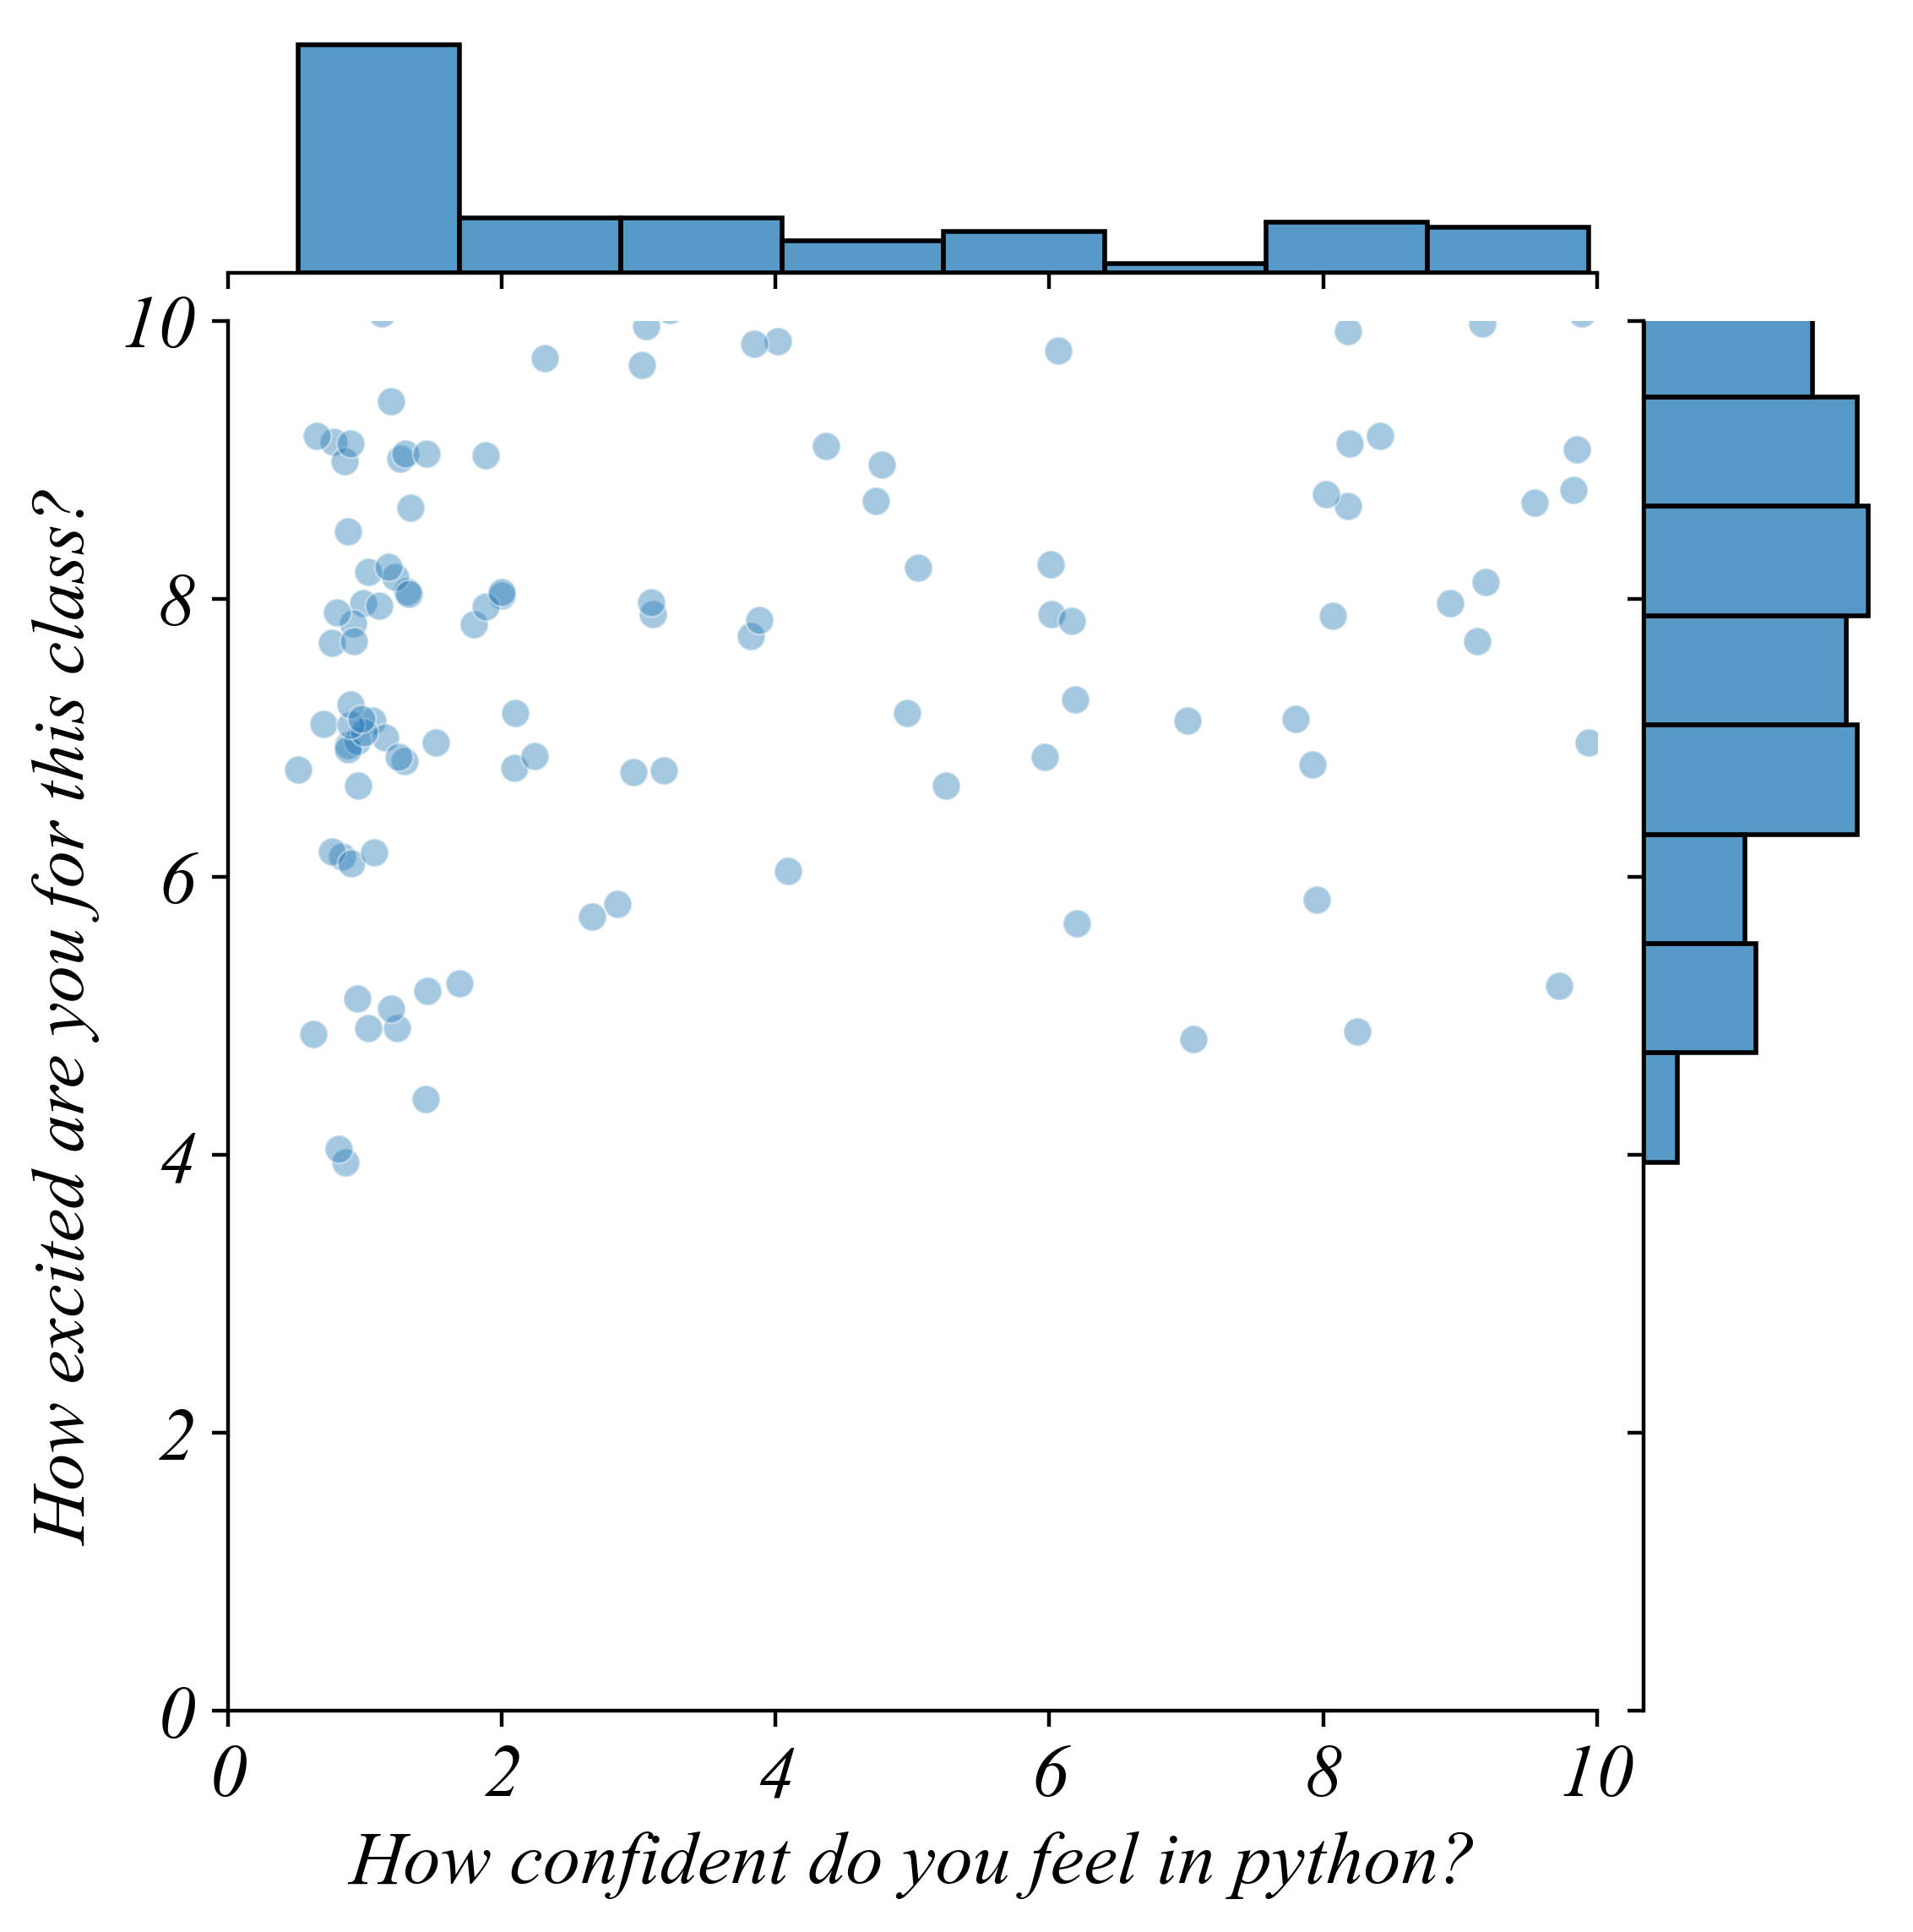

In [160]:
# Figure
plt.figure(figsize=(8, 8), dpi=400)

x_jitter = data['How confident do you feel in python?'] + np.random.normal(0, 0.2, len(data))
y_jitter = data['How excited are you for this class?'] + np.random.normal(0, 0.2, len(data))

sns.jointplot(x=x_jitter, y=y_jitter, alpha=0.4)

# Styling
plt.xlabel('How confident do you feel in python?')
plt.ylabel('How excited are you for this class?')
plt.ylim(0,10)
plt.xlim(0,10)

# Save
plt.savefig('i/survey_08.png')

## Economics Majors and Excitement

(0.0, 11.0)

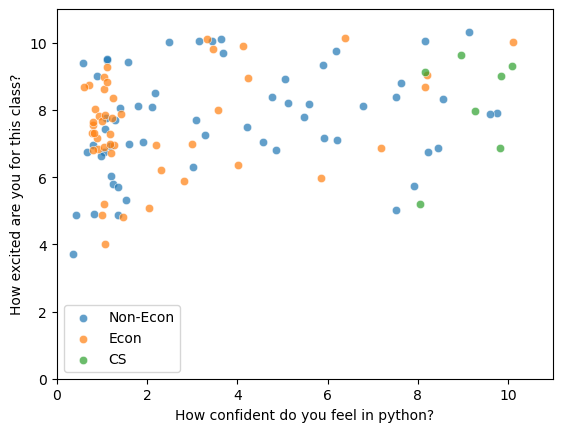

In [55]:

nmdata = data[~data['What is your (primary) major?'].isin(['Computer Science', 'Economics'])]
x_jitter = nmdata['How confident do you feel in python?'] + np.random.normal(0, 0.3, len(nmdata))
y_jitter = nmdata['How excited are you for this class?'] + np.random.normal(0, 0.3, len(nmdata))

sns.scatterplot(x=x_jitter, y=y_jitter, alpha=0.7, label='Non-Econ')

mdata = data[data['What is your (primary) major?'] == 'Economics']
x_jitter = mdata['How confident do you feel in python?'] + np.random.normal(0, 0.3, len(mdata))
y_jitter = mdata['How excited are you for this class?'] + np.random.normal(0, 0.3, len(mdata))

sns.scatterplot(x=x_jitter, y=y_jitter, alpha=0.7, label='Econ')

csdata = data[data['What is your (primary) major?'].isin(['Computer Science'])]
x_jitter = csdata['How confident do you feel in python?'] + np.random.normal(0, 0.3, len(csdata))
y_jitter = csdata['How excited are you for this class?'] + np.random.normal(0, 0.3, len(csdata))

sns.scatterplot(x=x_jitter, y=y_jitter, alpha=0.7, label='CS')

plt.xlabel('How confident do you feel in python?')
plt.ylabel('How excited are you for this class?')

plt.ylim(0,11)
plt.xlim(0,11)